# DS_PROD-1. Подготовка модели к продакшену и деплой

## 1. Введение

Добро пожаловать в раздел, посвящённый моделям машинного обучения в production

Модели машинного обучения сами по себе никому не нужны — они создаются для того, чтобы приносить пользу. В этом и последующих модулях мы разберём, как заставить ML-модель работать на бизнес.

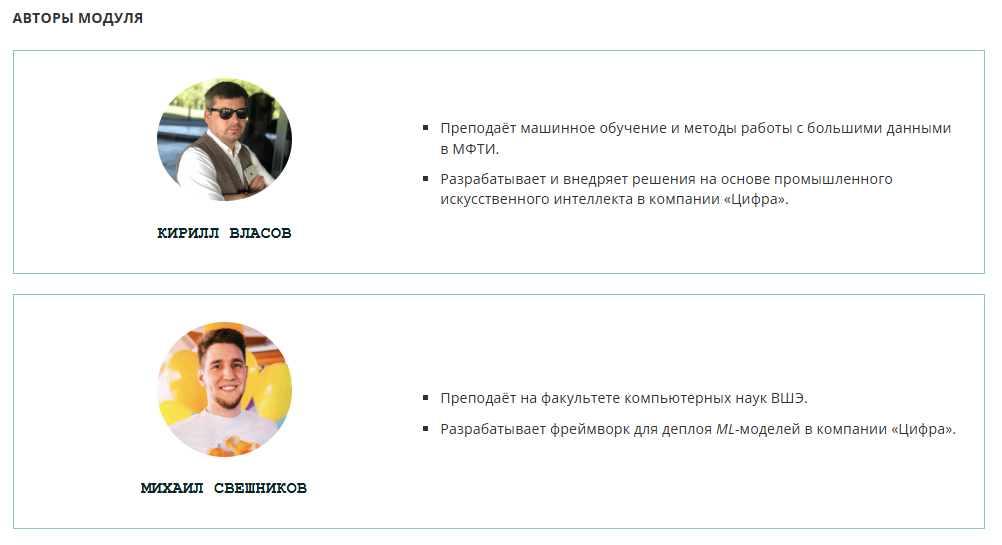

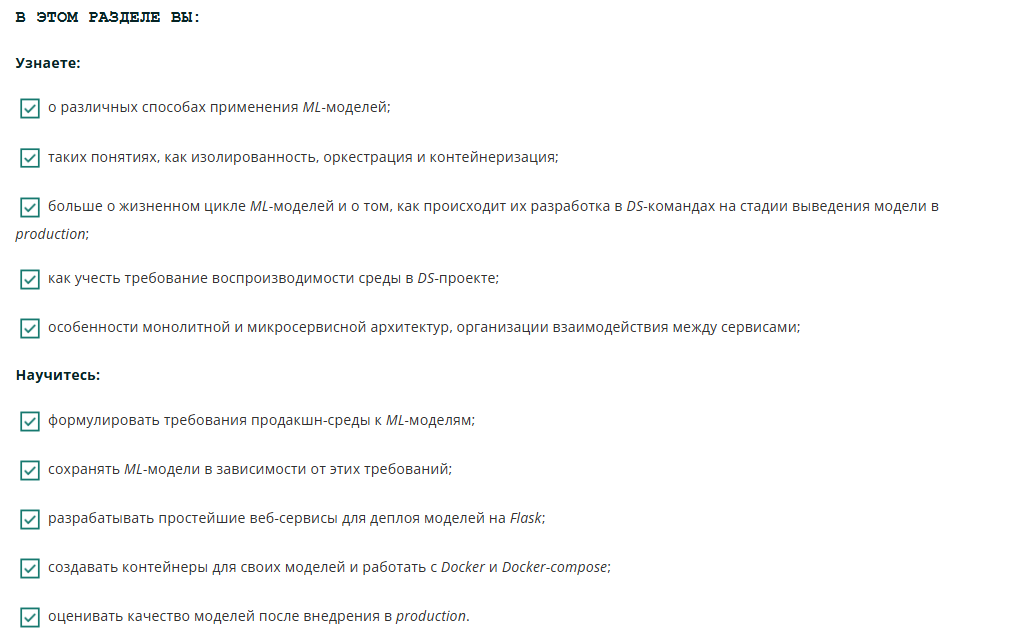

### МОДЕЛИ В ВАКУУМЕ НИКОМУ НЕ НУЖНЫ

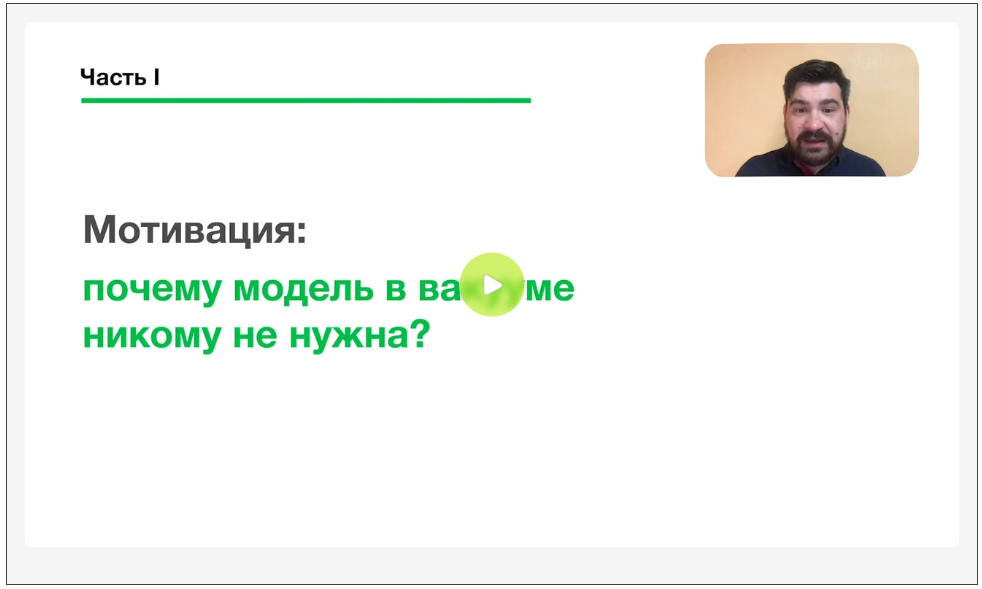

Вы уже умеете создавать модели машинного обучения: они выдают какие-то предсказания, и вы научились оценивать их с помощью метрик качества. Вы можете составлять графики и делать выводы на основе данных. Но что дальше?

Важно задать себе следующие вопросы:

- Какими будут основные потребители результатов? Это будут другие сервисы? Или модель будет встроена в мобильное приложение?
- Как и в каком виде потребители ожидают получать результаты? По времени или по запросу? Если по запросу, то по каким правилам они будут его осуществлять?
- Какая для этого существует (или планируется) инфраструктура?

### ВСПОМИНАЕМ CRISP-DM

Существует множество методологий для управления Data Science-проектами. Наиболее распространённой методологией разработки является знакомая нам модель Cross-Industry Standard Process for Data Mining, или CRISP-DM. Давайте ещё раз взглянем на её этапы:

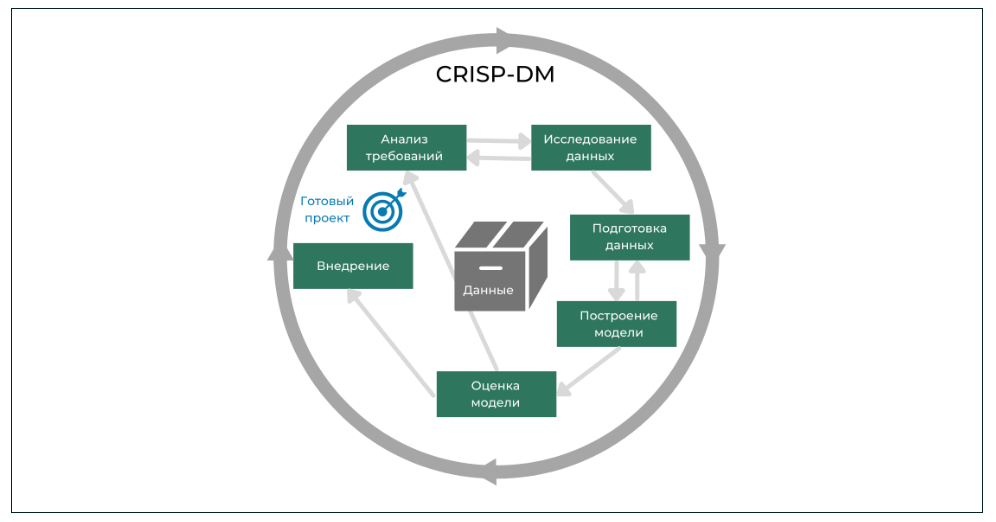

Примечание. Если вы забыли, что из себя представляет методология разработки CRISP-DM, рекомендуем заглянуть в модуль ML-1. «Теория машинного обучения».

На этапе внедрения мы должны понять, будет ли происходить деградация модели во времени в связи с изменением распределений входных данных и возможно ли автоматизировать оценку качества, обновление моделей и их деплой.

Как учесть все эти сложности в процессе разработки моделей? Вот с этим мы и будем разбираться.

### ДЕПЛОЙ МОДЕЛИ

Задача развёртывания приложения на сервере называется деплой (от англ. deployment — внедрение, развёртывание). По сути, это процесс трансформации исходного кода вашего приложения в рабочее состояние на конкретном сервере.

Для того чтобы внедрить модель в продакшн (в минимальном варианте), необходимо:

1. Сохранить обученную модель в файл.
2. Поднять сервер.
3. Доставить и запустить на нём свою модель.

Звучит довольно просто, не так ли?

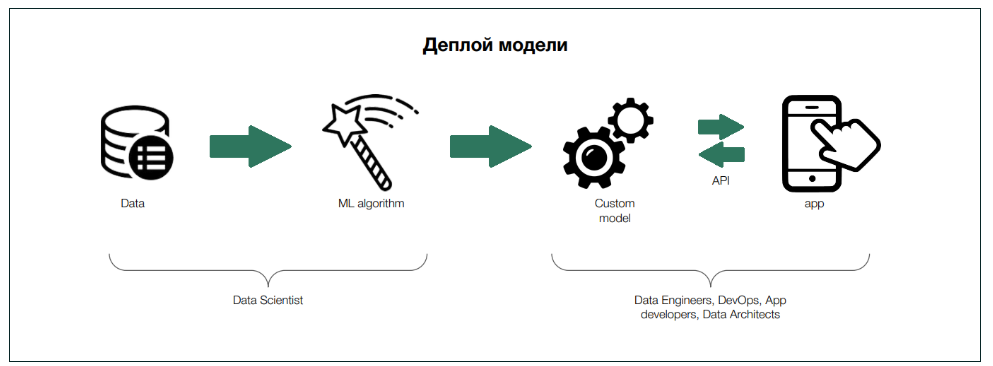

К сожалению, при моделировании зачастую не учитываются вопросы, связанные с деплоем модели и её внедрением в уже существующие системы. Для чего мы обучили модель? Может быть, мы будем использовать её для чат-бота? Может, она должна быть встроена в приложение для iPhone? Как часто потребуется переобучать модель?

Опыт подсказывает, что если модель создаётся «в вакууме», то в итоге её просто нельзя будет вывести в продакшн.

Дополнительной проблемой является то, что большинство библиотек для машинного обучения сфокусированы именно на обучении, а не на предсказании.

Кроме того, в крупных компаниях дата-сайентисты, дата-инженеры, ML-инженеры, занимающиеся внедрением моделей в продакшн, могут быть не просто разными людьми, но и разными командами. На практике может оказаться так, что готовая обученная модель будет внедрена другой командой на другом языке программирования. При этом обычным разработчикам модели машинного обучения могут представляться непрозрачными загадочными чёрными ящиками.

В этом модуле мы будем учиться подготавливать модели к внедрению в продакшн и разворачивать собственный веб-сервис. Как вы увидите дальше, код, который мы написали в Jupyter Notebook, практически никогда не попадает в продакшн без изменений.

**Цели этого модуля:**

- Понять, что такое инференс модели и как организуется сохранение и загрузка модели.
- Узнать, что такое сериализация и десериализация и научиться их различать.
- Понять, что делать, если итоговый проект реализован на другом языке программирования, а ваша модель обучена на Python.
- Рассмотреть вопросы сетевого взаимодействия и узнать о настройке взаимодействия между серверами по сети.
- Закрепить умение писать запросы к серверу (мы затрагивали эту тему в модуле PY-17. «Как получать данные из веб-источников и API», но теперь веб-источник мы будем создавать сами).
- Разобрать основные отличия и области применения фреймворков для разработки веб-сервисов (Django, FastAPI и, конечно, Flask).
- Научиться использовать фреймворк Flask для реализации простейших сервисов моделей.
- Познакомиться с инструментами uWSGI и NGINX, которые помогают повысить пропускную способность и производительность сервера.

# 2. Сохранение и загрузка моделей: pickle и joblib